In [ ]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [ ]:
# load data
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
dataset = loadtxt('data/pima-indians-diabetes.csv', delimiter=',')

In [ ]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [ ]:
# fit model no training data
model = XGBClassifier()

eval_set = [(X_test, y_test)]

model.fit(X_train, y_train, eval_metric='error', eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

[0]	validation_0-error:0.22179	validation_0-logloss:0.655153	validation_1-error:0.259843	validation_1-logloss:0.660186
[1]	validation_0-error:0.202335	validation_0-logloss:0.623322	validation_1-error:0.26378	validation_1-logloss:0.634854
[2]	validation_0-error:0.196498	validation_0-logloss:0.596814	validation_1-error:0.26378	validation_1-logloss:0.61224
[3]	validation_0-error:0.200389	validation_0-logloss:0.574027	validation_1-error:0.255906	validation_1-logloss:0.593118
[4]	validation_0-error:0.202335	validation_0-logloss:0.553853	validation_1-error:0.255906	validation_1-logloss:0.578303
[5]	validation_0-error:0.202335	validation_0-logloss:0.536789	validation_1-error:0.26378	validation_1-logloss:0.564942
[6]	validation_0-error:0.194553	validation_0-logloss:0.521477	validation_1-error:0.23622	validation_1-logloss:0.555113
[7]	validation_0-error:0.200389	validation_0-logloss:0.507802	validation_1-error:0.255906	validation_1-logloss:0.54499
[8]	validation_0-error:0.194553	validation_0-lo

[68]	validation_0-error:0.118677	validation_0-logloss:0.302821	validation_1-error:0.216535	validation_1-logloss:0.503108
[69]	validation_0-error:0.120623	validation_0-logloss:0.30198	validation_1-error:0.216535	validation_1-logloss:0.502674
[70]	validation_0-error:0.120623	validation_0-logloss:0.29991	validation_1-error:0.216535	validation_1-logloss:0.502662
[71]	validation_0-error:0.122568	validation_0-logloss:0.298055	validation_1-error:0.216535	validation_1-logloss:0.50343
[72]	validation_0-error:0.120623	validation_0-logloss:0.296987	validation_1-error:0.216535	validation_1-logloss:0.504037
[73]	validation_0-error:0.120623	validation_0-logloss:0.295123	validation_1-error:0.216535	validation_1-logloss:0.504439
[74]	validation_0-error:0.118677	validation_0-logloss:0.294368	validation_1-error:0.216535	validation_1-logloss:0.503696
[75]	validation_0-error:0.118677	validation_0-logloss:0.293513	validation_1-error:0.216535	validation_1-logloss:0.504477
[76]	validation_0-error:0.116732	va

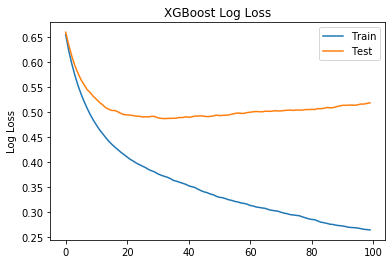

In [ ]:
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(X_train, y_train, eval_metric=['error', 'logloss'], eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

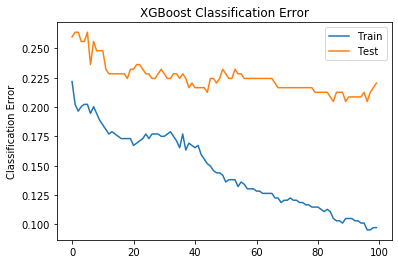

In [ ]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [ ]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=40, eval_metric='error', eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

[0]	validation_0-error:0.259843
Will train until validation_0-error hasn't improved in 40 rounds.
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.